<a href="https://colab.research.google.com/github/sentimentalhoon/python_colab/blob/main/ex03_irisData_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- irisData 를 활용해 붓꽃 품종을 분류
- 인공신경망으로 다중분류 문제 해결

In [ ]:
# 필요한 라이브러리 불러오기 ( 환경 세팅 )

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
# 번치객체, 딕셔너리 형식 활용

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 데이터 분리 ( 문제와 답)
X = iris['data']
y = iris['target']

print(f'{X.shape} {y.shape}')

(150, 4) (150,)


In [ ]:
# 훈련셋, 테스트셋 분리
# 7.5 : 2.5, random_state=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

print(f'{X_train.shape} {y_train.shape}')
print(f'{X_test.shape} {y_test.shape}')

(112, 4) (112,)
(38, 4) (38,)


In [ ]:
# 다중분류에서는 정답 데이터를 원핫 인코딩 해줘야 한다
# pd.get_dummies(target) -> DataFrame
# to_categorical(target) -> array
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_train_oh

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0

#### keras 인공신경망 생성!
- 1. 신경망 구조 설계
  - 뼈대 구축, 층 내용 정의
  - 출력층
    - 회귀 : units=1, a='linear'
    - 이진 : units=1, a='sigmoid'
    - 다중 : units=클래스 크기만큼, a='softmax'
- 2. 학습/평가 방법 설정
  - 회귀 : 'mse'
  - 이진분류 : 'binary_crossentropy'
  - 다중분류 : 'categorical_crossentropy'
- 3. 학습 및 현황 시각화
- 4. 예측 및 평가

In [ ]:
# 뼈대 구축
categorical_model = Sequential()
# 입력층 중간층, a=sigmoid
categorical_model.add(Dense(units=16, input_dim=4, activation='relu'))
# 중간층 2개, a=sigmoid
categorical_model.add(Dense(units=8, activation='relu'))
categorical_model.add(Dense(units=4, activation='relu'))
# 출력층, a=softmax
categorical_model.add(Dense(units=3,activation='softmax'))
# 모델 정보 요약
categorical_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                80        
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
Total params: 267 (1.04 KB)
Trainable params: 267 (1.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 2. 학습 평가
categorical_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'] # 분류 평가 지표
)

# 3. 학습 (반복 횟수 : epochs = 200)
h = categorical_model.fit(X_train, y_train_oh, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 1.5981 - accuracy: 0.3036
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.5283 - accuracy: 0.2946
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4656 - accuracy: 0.1339
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4117 - accuracy: 0.0089
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3710 - accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3282 - accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2871 - accuracy: 0.0000e+00
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 1.2387 - accuracy: 0.0000e+00
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1966 - accuracy: 0.0000e+00
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1586 - accuracy: 0.0446
Epoch 11/

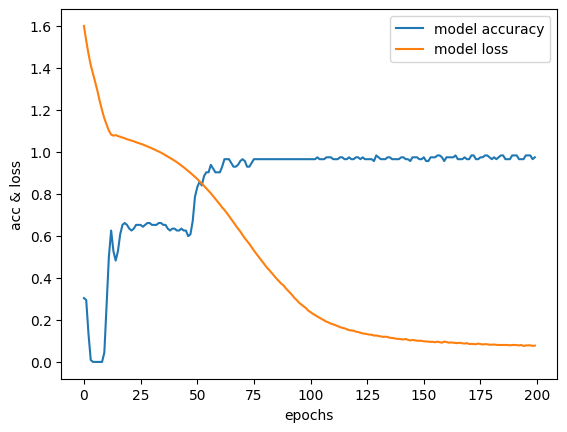

In [ ]:
# accuracy 시각화
accuracy = h.history['accuracy']
loss = h.history['loss']

plt.plot(accuracy, label='model accuracy')
plt.plot(loss, label='model loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc & loss')
plt.show()